In [153]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [154]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


In [155]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

## 데이터 확인하기 

In [156]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [157]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [158]:
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [159]:
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


## 데이터 분석하기 

- 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)
월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
힌트: groupby() 함수를 사용하세요

- 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)
여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

- 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

In [160]:
# 필수 문제 1
# 월별 매출액 추세
temp_var = sales_data
temp_var['date'] = sales_data['결제일시'].apply(lambda x: x[:7])
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
dtypes: int64(1), object(8)
memory usage: 499.7+ KB


In [161]:
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',', '')
temp_var['결제금액'] = temp_var['결제금액'].astype('int')
payment_data = temp_var.groupby('date')['결제금액'].sum().reset_index()

In [162]:
payment_data

,date,결제금액
0,2021-02,7000
1,2021-03,2104500
2,2021-04,3116600
3,2021-05,2537000
4,2021-06,3621500
5,2021-07,1215000
6,2021-08,1229000
7,2021-09,1197500
8,2021-10,2138500
9,2021-11,2748500


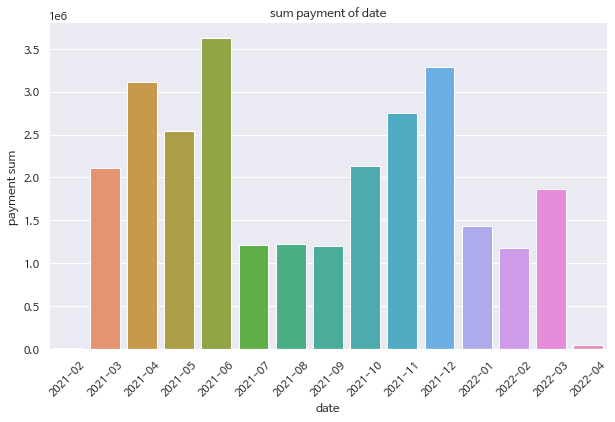

In [163]:
# 집계결과를 시각화 

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_data, x='date', y='결제금액')
plt.xlabel('date')
plt.ylabel('payment sum ')
plt.xticks(rotation=45)
plt.title('sum payment of date')
plt.show()

In [164]:
# 필수 2문제 
# 가장 인기있는 음료/ 음식

temp_var = temp_var[temp_var['판매수량'] > -1]
x = temp_var['상품명'].value_counts()
x.index

Index(['김치볶음밥', '라면', '짜장라면', '치즈불고기볶음밥', '계란추가', '낙지볶음밥', '새우볶음밥',
       '아메리카노(ICE)', '치즈감자튀김', '감자튀김', '치즈추가', '초코머핀', '불닭볶음면', '만두라면', '아이스티',
       '쿠키(초코칩)', '2인라면', '쿠키(마카다미아)', '치즈케이크', '미니마카롱(3개)', '레몬에이드', '블루베리머핀',
       '카페모카(ICE)', '초코라떼(ICE)', '소떡소떡', '샷추가', '아메리카노(HOT)', '쿠키(오트밀)',
       '청귤에이드', '자몽에이드', '바닐라라떼(ICE)', '청귤차(ICE)', '2인짜장라면', '청귤차(HOT)',
       '허니밀크쉐이크', '(면)치즈추가', '치킨카라아케 6pc', '(면)계란후라이 추가-불닭/짜장', '카페라떼(ICE)',
       '맵단대패삼겹덮밥', '플레인요거트스무디', '블루베리스무디', '크로플', '쿠앤크쉐이크', '딸기스무디',
       '카페라떼(HOT)', '한돈고추장불고기덮밥', '단짠대패삼겹덮밥', '초코쉐이크', '바닐라라떼(HOT)',
       '한돈간장불고기덮밥', '헤이즐넛라떼(ICE)', '만두', '순살닭다리덮밥', '딸기라떼(ICE)', '2인불닭',
       '버팔로윙 6pc', '민트초코칩쉐이크', '레몬차(ICE)', '카모마일(ICE)', '초코라떼(HOT)',
       '유자차(HOT)', '카페모카(HOT)', '아포카토', '(면)계란추가-국물라면', '유자차(ICE)', '자몽차(ICE)',
       '버팔로윙 10pc', '녹차라떼(ICE)', '시럽추가', '고구마라떼(ICE)', '페퍼민트(ICE)',
       '카모마일(HOT)', '망고스무디', '녹차(ICE)', '민트초코라떼(ICE)', '청귤커피(HOT)',
       '카라멜마끼아또(ICE)', '녹차라떼(HOT)', '레몬차(HOT)', '치킨카라

In [165]:
x = pd.DataFrame({'상품명' : x.index , 'count' : x.values })
x

,상품명,count
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
...,...,...
95,라면(계란/치즈추가),1
96,녹차(HOT),1
97,짜장라면(계란추가),1
98,이어폰(커널형),1


In [166]:
temp_item = x.head(10)
temp_item

,상품명,count
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


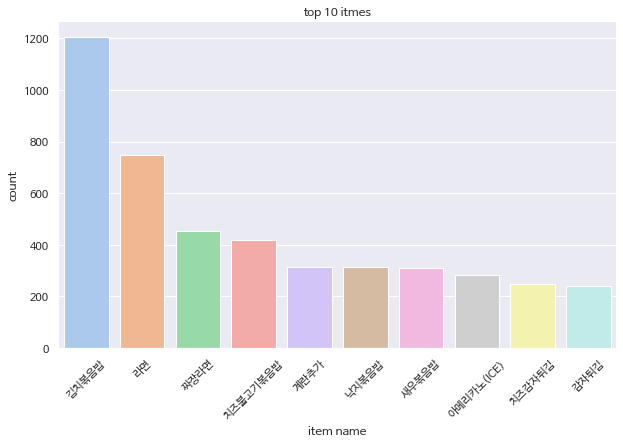

In [167]:
# 집계결과를 시각화 

plt.figure(figsize=(10, 6))
sns.barplot(data=temp_item, x='상품명', y='count')
plt.xlabel('item name')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.title('top 10 itmes')
plt.show()

In [168]:
item_payment = temp_var.groupby('상품명')['결제금액'].sum().reset_index()
item_payment.head(10)

,상품명,결제금액
0,(면)계란추가-국물라면,5000
1,(면)계란후라이 추가-불닭/짜장,20000
2,(면)치즈추가,10500
3,(밥)계란후라이 추가,3000
4,(밥)슈레드치즈추가,4500
5,(밥)체다치즈추가,2000
6,2인라면,1200
7,2인불닭,7000
8,2인짜장라면,12200
9,감자튀김,1083800


In [169]:
items_payment = item_payment.sort_values(ascending = False, by = '결제금액').reset_index(drop = True)
items_payment

,상품명,결제금액
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
...,...,...
95,비엔나소세지(토핑),3000
96,(밥)계란후라이 추가,3000
97,이어폰(커널형),3000
98,(밥)체다치즈추가,2000


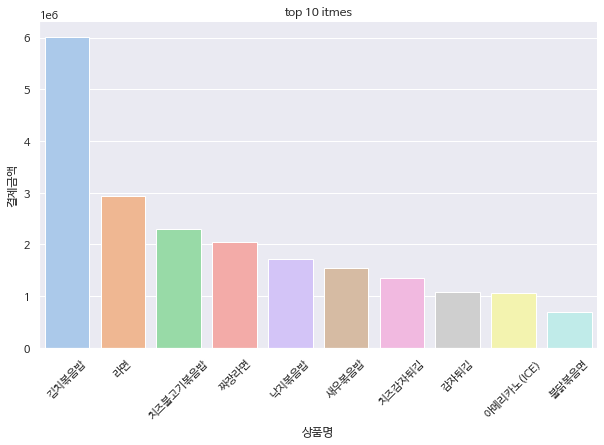

In [170]:
temp_items = items_payment.head(10)

# 집계결과를 시각화 

plt.figure(figsize=(10, 6))
sns.barplot(data=temp_items, x='상품명', y='결제금액')
plt.xlabel('상품명')
plt.ylabel('결제금액')
plt.xticks(rotation=45)
plt.title('top 10 itmes')
plt.show()

In [171]:
# 필수 문제 3
# 가장 많이 팔린 입장권 종류
temp_var = entry_data
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [172]:
temp_var['금액'] = temp_var['금액'].astype('int')
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [173]:
tickets = temp_var.groupby('요금제명')['금액'].sum().reset_index()
tickets = tickets.sort_values(by = '금액', ascending = False).reset_index(drop = True).head(10)
tickets

,요금제명,금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


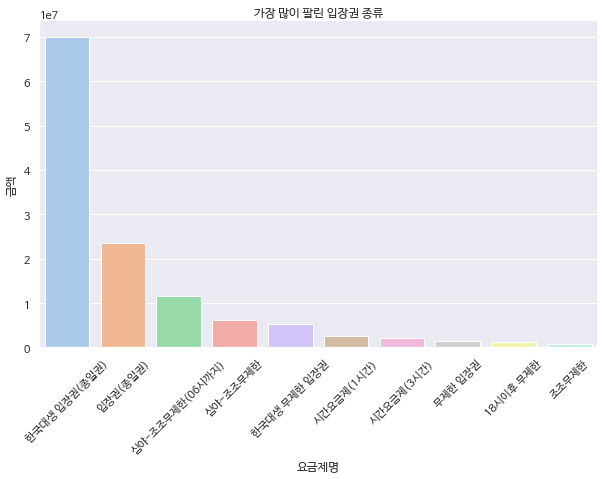

In [174]:
# 집계결과를 시각화 

plt.figure(figsize=(10, 6))
sns.barplot(data=tickets, x='요금제명', y='금액')
plt.xlabel('요금제명')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.title('가장 많이 팔린 입장권 종류')
plt.show()

# 내가 정의한 문제 해결하기

In [175]:
entry_data 

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [176]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [177]:
item_data

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
...,...,...,...,...
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"


In [178]:
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


#### 주어진 데이터를 확인해본 결과 중복되는 데이터가 많아서 중복제거를 시도 

In [179]:
 # entry_data 
entry_data_re = entry_data.drop_duplicates()
entry_data_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19321 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    19109 non-null  object
 1   입실      19321 non-null  object
 2   퇴실      19321 non-null  object
 3   이용      19301 non-null  object
 4   위치      19321 non-null  object
 5   금액      19321 non-null  int64 
 6   구분      19321 non-null  object
 7   고객      19321 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.3+ MB


In [180]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


-> 중복된 데이터가 많아 제거가 된것을 확인할 수 있다

### 내가 정의한 문제 
- 시간대 별 결제금액을 시각화하여 어느 시간때에 매출이 가장 좋은지 확인
- 분류 별 결제금액을 시각화하여 어떤 상품이 제일 많이 팔리는지 확인 

In [181]:
# 시간대 별 결제금액
temp_data = sales_data

# sales_data의 결제일시에서 시간을 가져옴 
temp_data['time'] = sales_data["결제일시"].apply(lambda x: x[11:13])
print(temp_data.info())
temp_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   int64 
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
 9   time    7105 non-null   object
dtypes: int64(2), object(8)
memory usage: 555.2+ KB
None


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,time
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,19
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04,19
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04,19
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04,19
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04,19
...,...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02,14
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02,13
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02,13
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02,13


In [182]:
# 시간별 판매 금액 구하기 
temp_data = temp_data[temp_data['판매수량'] > -1] # 판매 수량이 -1인 데이터 삭제 
time_sum = temp_data.groupby('time')['결제금액'].sum().reset_index()
time_sum

,time,결제금액
0,00,499500
1,07,16500
2,09,49500
3,10,1076600
4,11,1630800
5,12,2012600
6,13,1943300
7,14,1729200
8,15,2233700
9,16,2338700


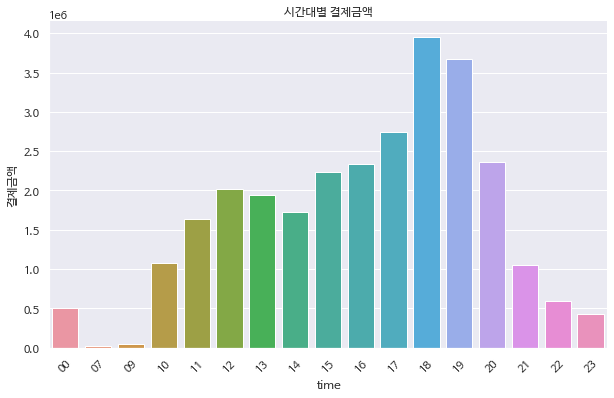

In [183]:
# 집계결과를 시각화 

plt.figure(figsize=(10, 6))
sns.barplot(data=time_sum, x='time', y='결제금액')
plt.xlabel('time')
plt.ylabel('결제금액')
plt.xticks(rotation=45)
plt.title('시간대별 결제금액')
plt.show()

- 18-19시에 제일 높은 매출금액이 찍힌것을 확인할 수 있다
- 07-09에서 매출금액이 제일 낮은 것을 알수 있다.

In [184]:
# 분류 별 결제금액
temp_data = sales_data[sales_data['판매수량'] > -1] # 판매 수량이 -1인 데이터 삭제 
temp_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,time
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,19
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04,19
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04,19
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04,19
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04,19
...,...,...,...,...,...,...,...,...,...,...
7097,2021-02-17 13:48,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02,13
7098,2021-02-17 13:50,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02,13
7099,2021-02-17 13:46,카운터,아메리카노(HOT),현금,결제완료,1,3500,NaN,2021-02,13
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02,13


In [185]:
# temp_data, item_data를 상품명을 기준으로 merge하기
temp_data = pd.merge(temp_data, item_data, on = '상품명' )
temp_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,time,구분,분류,판매금액
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,19,68,음식,"4,500원"
1,2022-03-31 14:51,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer751113,2022-03,14,68,음식,"4,500원"
2,2022-03-24 21:35,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer901892,2022-03,21,68,음식,"4,500원"
3,2022-03-12 17:42,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer339975,2022-03,17,68,음식,"4,500원"
4,2022-03-05 19:56,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer301352,2022-03,19,68,음식,"4,500원"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23759,2021-04-08 18:05,카운터,2인라면,현금,결제완료,1,0,NaN,2021-04,18,61,음식,100원
23760,2021-04-07 19:44,카운터,2인라면,현금,결제완료,1,0,NaN,2021-04,19,61,음식,100원
23761,2021-04-07 19:44,카운터,2인라면,현금,결제완료,1,0,NaN,2021-04,19,61,음식,100원
23762,2021-04-05 21:12,카운터,2인라면,현금,결제완료,1,0,NaN,2021-04,21,61,음식,100원


In [186]:
# 분류에 따라 결제금액 확인하기 
category = temp_data.groupby('분류')['결제금액'].sum().reset_index()
category = category.sort_values(by = '결제금액', ascending = False).reset_index(drop = True)
category

,분류,결제금액
0,음식,88620600
1,커피,8366000
2,차가운음료(커피외),4656500
3,디저트,2394500
4,스무디&쉐이크,1574400
5,따뜻한음료(커피외),485900
6,포장,34000
7,게임&TV,3000


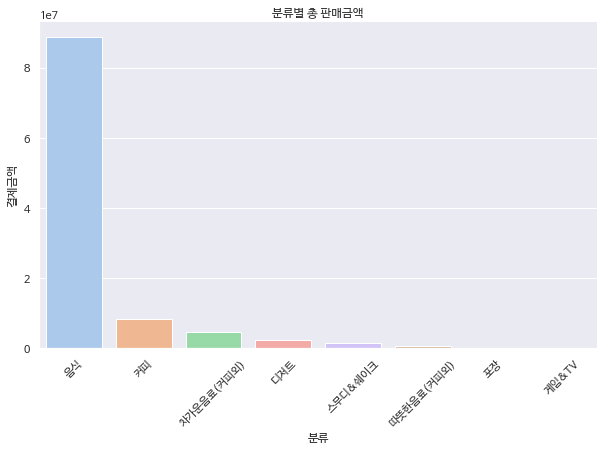

In [188]:
# 집계결과를 시각화 

plt.figure(figsize=(10, 6))
sns.barplot(data=category, x='분류', y='결제금액')
plt.xlabel('분류')
plt.ylabel('결제금액')
plt.xticks(rotation=45)
plt.title('분류별 총 판매금액')
plt.show()

- 음식 카테고리가 제일 많이 판매되는 것을 알 수 있다. 
- 커피를 비롯한 음료와 디저트판매가 저조하다는 것을 알수 있다. 

### 전략 수립 및 실행

1. 음식에 비해 커피나 다른 음료류의 판매가 많이 저조하다. 또 아침 시간대인 07-09시에 사용자가 제일 적다. 그래서 해당 시간때에 해피아워를 적용하시켜 입장료와 음료류를 할인하는 전략을 세워볼수 있다. 
2. 20시 이후에는 저녁을 먹고오는 이용자가 많을 것이다. 디저트와 음료의 판매량이 저조하기 때문에 저녁 8시이후 음료와 디저트세트를 제작하여 할인 판매하면 매출이 증대할 것으로 보인다.  
3. 분류에 따른 결제금액을 확인해보면 포장과 게임&TV는 다른 카테고리에 비해 현저히 낮은 것을 알수 있다. 많은 사람들이 이용하지 않는 서비스이기 때문에 포장과 게임&TV서비스를 종료하는 것이 이득이라고 판단된다.  

---

# 회고


## 프로젝트 목표

> - 모두 스터디카페의 시간별 입장 기록, 시간별 음식/음료, 판매하고 있는 음식/음료 종류와 가격, 판매하고 있는 입장권 종류와 가격 데이터를 분석하고 평가 및 앞으로의 전략을 수립해보기

## 성과 및 결과

> - 노드에서 제시한 월별 매출액 추세, 가장 인기있는 음식/음료, 가장 많이 팔린 입장권 종류에 대한 분석 및 시각화를 진행하였고 추가로 시간대 별 결제금액을 시각화하여 어느 시간때에 매출이 가장 좋은지 확인,
분류 별 결제금액을 시각화하여 어떤 상품이 제일 많이 팔리는지 확인하여 분석하였고 전략을 수립하였다. 

## 배운 점

> - 이번 노드에서 제시한 데이터들을 확인하며 데이터를 분석 것에 대하여 배울 수 있었고 이미 지난 노드들에서 배웠었지만 잊어버렸던 pandas, seaborn 라이브러리 사용법에 대하여 리마인드 할 수 있었다.  

## 개선할 점

> - 데이터 분석 및 시각화를 진행할때 pandas, seaborn 라이브러리에 대하여 아직 능숙하지 못한것같다는 느낌을 받아 좀 더 능숙하게 사용할 수 있도록 학습을 해야되겠다. 

## 결론

> - 데이터를 이용한 분석 및 시각화를 하고 이를 토대로 평가 및 전략을 세워보았다. 이를 진행하면서 아직 나에게 부족한 부분이 많다는 것을 느꼈고 부족한 부분을 채워나가기 위해서 학습을 열심히 해야겠다.